 # Jason's honours project code
 ## Motor optimisation part

In [1]:
import numpy as np
from scipy.constants import mu_0
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from PIL import Image, ImageDraw, ImageColor
import matplotlib.pyplot as plt

In [9]:
# Things that aren't easily changed
Br_core = 1.2
rho_wire = 2.3e6
V_max = 12
l_max_tube = 4.5
l_plunger = 0.005
thickness_shell = 0.0025
distance_rg2 = 0.001
rel_perm_steel = 2000
rel_perm_neo = 1.05
rel_perm_air = 1

In [2]:
def motorCalc(r_tube_in_mm, r_tube_thick_mm, l_core_mm, r_core_mm, l_connector_mm, extra_gap_mm, layers, I_max):        
    # Convert back to m - really small values don't work well with interactive sliders
    r_tube_in = r_tube_in_mm/1000
    r_tube_out = r_tube_in + r_tube_thick_mm/1000
    l_core = l_core_mm/1000
    r_core = r_core_mm/1000 
    l_connector =l_connector_mm/1000
    extra_gap = extra_gap_mm/1000
    
    # Physical dimensions that can be calculated directly from known
    r_shell_in = r_core+r_tube_out*layers+extra_gap
    r_shell_out = r_shell_in + thickness_shell
    r_plunger = r_shell_in - distance_rg2
    
    # Electromagneticmotive force calculation - zero reluctance circuit
    A_cross_magnet = np.pi*r_core**2
    print("A_cross_magnet: {} m2".format(A_cross_magnet))
    print("l_core: {} m".format(l_core))
    
    flux_rg0 = A_cross_magnet * Br_core
    rM_m = l_core/(A_cross_magnet*rel_perm_neo) # massive?
    emmf = flux_rg0 * rM_m
    print("emmf: {}".format(emmf))
    
    # Reluctance in each of the gaps + total
    rM_g1 = np.log(r_shell_in/r_core)/(2*np.pi*l_connector*rel_perm_neo)
    rM_g2 = np.log(r_shell_in/r_plunger)/(2*np.pi*l_plunger*rel_perm_neo)
    rM_ttl = rM_m+rM_g1+rM_g2
    print("rg1: {:.4f}\nrg2: {:.4f}\nrTtl: {:.4f}".format(rM_g1,rM_g2,rM_ttl))
    
    # Magnetic flux in circuit
    flux_w_gap = emmf / rM_ttl
    print("flux in circuit: {} Wb".format(flux_w_gap))
    
    # Turns of wire - same regardless of layer
    turns_in_field = l_connector/(r_tube_out*2)
    turns_total = np.floor((l_core+l_connector)/(2*r_tube_out))
    
    # Loop through every layer
    R_ttl = 0
    V_ttl = 0
    force_ttl = 0
    l_ttl = 0  
    for layer in range(1,layers+1):
        # length of wire in this layer + in this layer & in field
        l_in_field_this = np.pi*(r_core+layer*r_tube_out*2)*2*turns_in_field
        l_this = np.pi*(r_core+layer*r_tube_out*2)*2*turns_total
        l_ttl += l_this
        
        # Resistance and voltage from powering wires in this layer
        R_this = l_this/(np.pi*r_tube_in**2)/rho_wire
        V_this = R_this * I_max
        R_ttl += R_this
        V_ttl += V_this
        
        # Area over which the flux will be spread, at the distance of this layer
        r_at_wire = r_core + layer*2*r_tube_out - r_tube_out
        A_field_action = 2*np.pi*r_at_wire*l_connector
        
        # Field acting on this layer of wire
        field_over_gap = flux_w_gap/A_field_action
        
        # Force = BIL
        force_this = field_over_gap*I_max*l_in_field_this
        force_ttl += force_this

        print("Force at layer {}: {:.4f} N".format(layer,force_this))
    power_ttl = I_max * V_ttl
    print("Total length of tube: {} m".format(l_ttl))
    print("Total power: {} W".format(power_ttl))
    print("Total Force: {} N".format(force_ttl))
    print("Effectivness: {} N/sqrt(W)".format(force_ttl/np.sqrt(power_ttl)))
    
    # Add sketch - automated probably
    
    # Figure out how to choose current - probably something that doesn't melt - how hot?
    # 9 N - Goal - Simran - Remind to calculate displacement
    
    # Also what if liquid in wire is flowing? Flow resistance
    # Bryan is not optimistic
    # Two wires wound in same direction, flow in opposite directions.
    # Pool on one side, connected on other. One node in pool, one on connection.
    # Do calculations to see fesibility
    
    # Investigate other cooling methods?

In [4]:
interact(motorCalc,r_tube_in_mm=0.75,r_tube_thick_mm=0.8,l_core_mm=50,r_core_mm=20,l_connector_mm=4,extra_gap_mm=0,I_max = 5,layers=3)

interactive(children=(FloatSlider(value=0.75, description='r_tube_in_mm', max=2.25, min=-0.75), FloatSlider(va…

<function __main__.motorCalc(r_tube_in_mm, r_tube_thick_mm, l_core_mm, r_core_mm, l_connector_mm, extra_gap_mm, layers, I_max)>

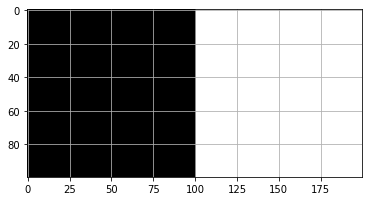

In [8]:
def draw_motor(max_width=200,max_height=100)
    x0=0
    y0=0
    x1=100
    y1=100

    im = Image.new("RGB",(max_width,max_height),"white")
    draw = ImageDraw.Draw(im)
    shell = draw.rectangle([(x0, y0), (x1, y1)],fill="black")

    plt.grid(True,"major","both")
    plt.imshow(im)

 | Name | Units | Description |
 |------|-------|-------------|
 | r_tube_In | m | Inner radius of sillicone tube |
 | r_tube_thick | m | Thickness of sillicone tube |
 | r_tube_Out | m | Outer radius of sillicone tube |
 | l_core | m | Length of motor core |
 | Br_core | T | Residual magnetic field stength of core |
 | r_core | m | Radius of motor core |
 | rho_wire | S/m | Resistivity of wire |
 | V_max | V | Max voltage output of power supply |
 | I_max | A | Max current output of power supply |
 | l_max_tube | m | How much tube I have |
 | l_connector | m | How much magnetic connector at the end of the magnet |
 | l_plunger | m | Length of plunger connector |
 | thickness_shell | m | Thickness of iron shell |
 | distance_rg2 | m | Distance between plunger and shell |
 |turns_in_field | #NA# | Turns of wire in field |
 |turns_total | #NA# | Turns of wire total |
 | A_cross_magnet | m^2 | Cross sectional area of the magnet |
 | flux_rg0 | Wb | Magnetic flux of magnet with magnet only |
 | rM_m | H^-1 | Reluctance across magnet |
 | emmf | #NA# | Electromagneticmotive force |
 | layer | #NA# | The layer of wire in this calculation |
 | r_shell_in | m | Inner shell diameter |
 | r_shell_out | m | Outer shell diameter |
 | r_plunger | m | Plunger diameter |
 | rM_g1 | H^-1 | Gap1 (coil driving) reluctance |
 | rM_g2 | H^-1 | Gap2 (plunger) reluctance |
 | rM_ttl | H^-1 | Total reluctance |
 | flux_w_gap | Wb | Magnetic flux in circuit with gaps |
 | r_at_wire | m | radius of wire layer |
 | l_in_field_this | m | Length of wire in magnetic field in this layer |
 | l_this | m | Length of wire in this layer |
 | R_this | Ohm | Wire resistance this layer |
 | V_this | V | Voltage required this layer |
 | A_field_action | m^2 | Area of wire the field acts on |
 | field_over_gap | m | Magnetic field over Gap1 (coil driving) |
 | force | m | Force generated |